<a href="https://colab.research.google.com/github/Shaheer-khan-github/Estimating-Carbon-Emission-by-Vehicles-Volume-using-DataAnalysis-and-Machine-learning/blob/main/Estimating_Carbon_Emission_by_Vehicles_Volume_using_DataAnalysis_and_Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import dependencies**

In [7]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error

### **Cloning Github Repository**

In [8]:
!git clone https://github.com/Shaheer-khan-github/Estimating-Carbon-Emission-by-Vehicles-Volume-using-DataAnalysis-and-Machine-learning.git

Cloning into 'Estimating-Carbon-Emission-by-Vehicles-Volume-using-DataAnalysis-and-Machine-learning'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [9]:
cd /content/Estimating-Carbon-Emission-by-Vehicles-Volume-using-DataAnalysis-and-Machine-learning/

/content/Estimating-Carbon-Emission-by-Vehicles-Volume-using-DataAnalysis-and-Machine-learning


In [11]:
df = pd.read_csv('yarra-traffic-counts.csv')
df.head()

,date_captured,road_name,section_start,section_end,suburb,direction_1,vehicles_1,direction_2,vehicles_2,volume_per_day,85th_percentile_speed
0,2015-Jan,Butler Street,Jonas Street,Shelley Street,Richmond,East/North,192,West/South,261,453,28.4
1,2015-Jan,Rae Street,Liverpool Street,Scotchmer Street,Fitzroy North,East/North,1115,West/South,784,1899,40.7
2,2015-Jan,Rae Street,Reid Street,Scotchmer Street,Fitzroy North,East/North,955,West/South,1531,2486,40.7
3,2015-Jan,Shelley Street,Butler Street,Victoria Street,Richmond,East/North,1659,West/South,1638,3297,35.3
4,2010-Jan,Hood Street,Hoddle Street,Islington Street,Collingwood,East/North,438,West/South,12,450,32.0


### **Exploratory Data Analysis**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1521 entries, 0 to 1520
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date_captured          1521 non-null   object 
 1   road_name              1521 non-null   object 
 2   section_start          1521 non-null   object 
 3   section_end            1515 non-null   object 
 4   suburb                 1521 non-null   object 
 5   direction_1            1521 non-null   object 
 6   vehicles_1             1521 non-null   int64  
 7   direction_2            1521 non-null   object 
 8   vehicles_2             1521 non-null   int64  
 9   volume_per_day         1521 non-null   int64  
 10  85th_percentile_speed  1521 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 130.8+ KB


In [13]:
df.describe()

,vehicles_1,vehicles_2,volume_per_day,85th_percentile_speed
count,1521.000000,1521.000000,1521.000000,1521.000000
mean,1000.863248,1003.417488,2004.280736,37.780237
std,1400.111989,1446.280627,2718.209947,6.893218
min,0.000000,0.000000,6.000000,14.000000
25%,214.000000,187.000000,480.000000,34.200000
50%,495.000000,483.000000,975.000000,38.200000
75%,1080.000000,1072.000000,2030.000000,41.900000
max,12068.000000,12497.000000,23457.000000,79.500000


In [14]:
print('Road_Name:\n')
df['road_name'].value_counts()[:10].to_frame().style.bar()

Road_Name:



,road_name
Wellington Street,33
Park Street,30
Rae Street,26
Rose Street,17
George Street,16
Napier Street,16
Gold Street,16
Scotchmer Street,15
Gore Street,14
Miller Street,14


In [15]:
print('Section Start:\n')
df.section_start.value_counts()[:10].to_frame().style.bar()

Section Start:



,section_start
Gipps Street,62
Nicholson Street,45
Burnley Street,41
Bridge Road,33
Church Street,33
Gold Street,32
Johnston Street,28
Alexandra Parade,27
Langridge Street,24
Hoddle Street,24


In [16]:
print('Section End:\n')
df.section_end.value_counts()[:10].to_frame().style.bar()

Section End:



,section_end
Wellington Street,51
Swan Street,33
Park Street,32
Rathdowne Street,32
Rae Street,29
Victoria Street,27
Smith Street,26
Scotchmer Street,24
Roseneath Street,24
Hoddle Street,23


In [17]:
print('Suburb:\n')
df.suburb.value_counts()[:5].to_frame().style.bar()

Suburb:



,suburb
Richmond,469
Collingwood,212
Fitzroy North,179
Carlton North,156
Fitzroy,128


In [18]:
df_volume_pd_sum = df.groupby(["road_name",'section_start','section_end','suburb']).volume_per_day.sum().reset_index()
df_volume_pd_sum = df_volume_pd_sum.sort_values(by=['volume_per_day'],ascending=False)
df_volume_pd_sum.head()

,road_name,section_start,section_end,suburb,volume_per_day
670,Rathdowne Street,Newry Street,Ogrady Street,Carlton North,38030
585,Nicholson Street,Studley Street,Yarra Street,Abbotsford,37915
671,Rathdowne Street,Pigdon Street,Richardson Street,Carlton North,35749
743,Scotchmer Street,Best Street,Birkenhead Street,Fitzroy North,34679
747,Scotchmer Street,Mark Street,Woodhead Street,Fitzroy North,33402


Text(0, 0.5, 'Rows Index')

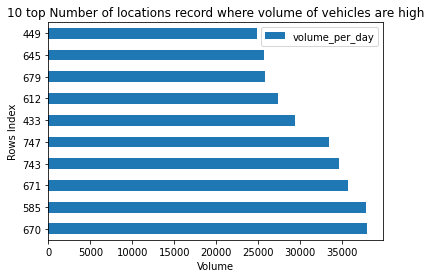

In [19]:
df_volume_pd_sum = df_volume_pd_sum[:10]
df_volume_pd_sum.plot(kind='barh')
plt.title('10 top Number of locations record where volume of vehicles are high')
plt.xlabel('Volume')
plt.ylabel('Rows Index')

In [20]:
correlation = df.corr()
correlation

,vehicles_1,vehicles_2,volume_per_day,85th_percentile_speed
vehicles_1,1.000000,0.823876,0.953447,0.352604
vehicles_2,0.823876,1.000000,0.956438,0.342199
volume_per_day,0.953447,0.956438,1.000000,0.363696
85th_percentile_speed,0.352604,0.342199,0.363696,1.000000


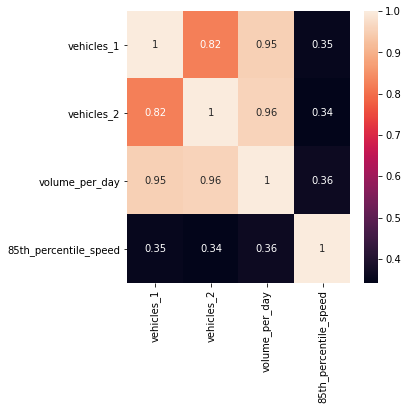

In [21]:
# Visualization of correlation matrix heatmap 
plt.figure(figsize=(5,5))
sns.heatmap(correlation, annot = True)
plt.show()

### **Model Fitting**

In [22]:
# Independent variables
x = df.iloc[:, [6,8,10]].values

# Dependent variable
y = df.iloc[:, 9].values

In [23]:
print('Shape of independent variables:\n',x.shape,'\n','-' * 80)
print('Shape of dependent variable:\n',y.shape)

Shape of independent variables:
 (1521, 3) 
 --------------------------------------------------------------------------------
Shape of dependent variable:
 (1521,)


In [24]:
y=y.reshape(-1,1)

In [25]:
y.shape

(1521, 1)

In [26]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
x = sc_X.fit_transform(x)
y = sc_y.fit_transform(y)

In [27]:
# Choose the model
SVR_model= SVR()

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.40, random_state=42)

In [29]:
# Train the model
SVR_model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### **Evaluation**

In [30]:
y_pred = SVR_model.predict(x_test)
y_pred[:15]

array([ 1.32071977, -0.36243866, -0.55748861, -0.27590357, -0.58373703,
       -0.61277244, -0.58988244, -0.27887184, -0.61225762, -0.57813324,
        0.02535599, -0.20902739, -0.60794781, -0.18566219, -0.59926502])

In [31]:
y_test[:15]

array([[ 0.0186652 ],
       [-0.38872205],
       [-0.54917448],
       [-0.18374039],
       [-0.61357626],
       [-0.63712891],
       [-0.6294007 ],
       [-0.38025782],
       [-0.66252161],
       [-0.61688835],
       [-0.02954413],
       [-0.23820589],
       [-0.66252161],
       [-0.10535422],
       [-0.59775182]])

In [32]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

0.2956971735086215

Reference:

[Australian government](https://data.gov.au/)

[Support Vector Regression in Python Using Scikit-Learn](https://heartbeat.fritz.ai/support-vector-regression-in-python-using-scikit-learn-89cc18e933b7)

[Support Vector Regression Tutorial for Machine Learning](https://www.analyticsvidhya.com/blog/2020/03/support-vector-regression-tutorial-for-machine-learning/)